In [1]:
#%% Modüller eklenir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#%% Veri yüklenir
DATA_PATH = "./annual_csv.csv"
try:
  df = pd.read_csv(DATA_PATH)
except:
  !pip install datapackage
  import datapackage
  data_url = 'https://datahub.io/core/global-temp/datapackage.json'
  # to load Data Package into storage
  package = datapackage.Package(data_url)
  # to load only tabular data
  resources = package.resources
  df = pd.read_csv(resources[1].descriptor['path'])

df.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


In [3]:
#%% Veri ve model yüklenir, gerekli fonksiyonlar oluşturulur
df = df[df["Source"] == "GISTEMP"] # GISTEMP 137 X 3
df = df.sort_values(by=['Year']) # Yıla Göre Sıralar
series = df.loc[:, "Mean"].values

WINDOW_SIZE = 30

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30 , activation="relu", input_shape=[WINDOW_SIZE]),
  tf.keras.layers.Dense(30 , activation="relu"),
  tf.keras.layers.Dense(1)
])

model.load_weights("global_warm_TS.h5")

def plot_series(time, series, label, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Zaman")
    plt.ylabel("Değerler")
    plt.grid(True)

       Yıl  Tahminler
0   2017.0   0.856787
1   2018.0   0.930540
2   2019.0   0.914398
3   2020.0   0.921239
4   2021.0   0.963282
5   2022.0   1.007040
6   2023.0   1.004703
7   2024.0   0.990999
8   2025.0   1.083478
9   2026.0   1.111901
10  2027.0   1.111954
11  2028.0   1.092169
12  2029.0   1.094988
13  2030.0   1.179211


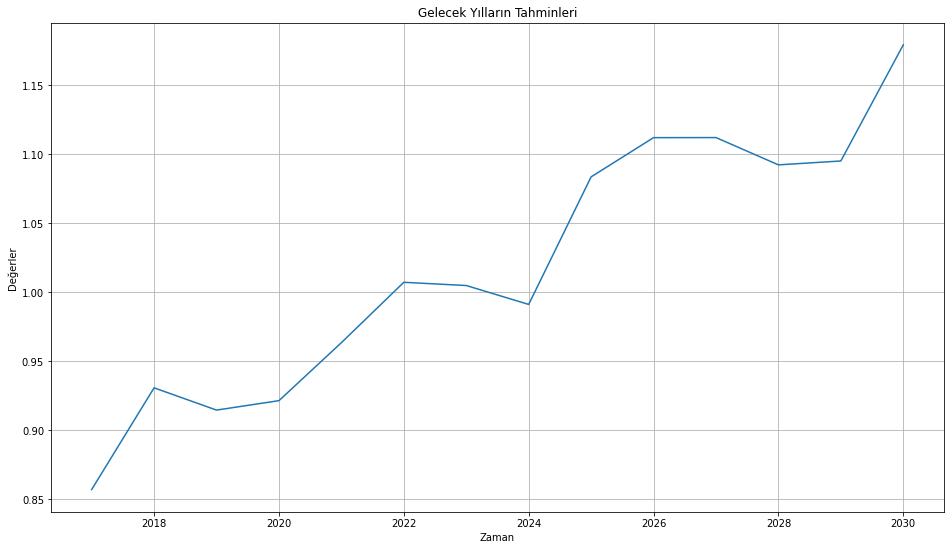

In [4]:
years = 14
last_year = 2016

forecast = series[-WINDOW_SIZE:].tolist()
for i in range(years):
    prediction = model.predict(np.array([forecast[-WINDOW_SIZE:]]))
    forecast.append(float(prediction))
forecast = forecast[-years:]
time_fu = range(last_year+1, last_year+years+1)
plt.figure(figsize=(16, 9))
plot_series(time_fu, forecast, "tahminler")
plt.title("Gelecek Yılların Tahminleri")
time_ser = np.array([time_fu]).reshape((-1,1))
forecast_ser = np.array([forecast]).reshape((-1,1))
results = np.concatenate((time_ser, forecast_ser), axis = 1)
result_df = pd.DataFrame(results, columns=("Yıl", "Tahminler"))
print(result_df)